# Analysis of Benham's data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging 
import os
from s2putils import *
from fileops import *
from plotters import *
from viewers import view_stack
from logger import logger

logger.setLevel(logging.INFO)

### Input data

 25/02/2022 12:09:46: loaded (500, 512, 512) int16 stack from "/Users/tlemaire/Documents/data/benham/raw/10x 1.85 Mhz 420000 20x 2v  31mw na-1_00002.tif"
 25/02/2022 12:09:47: plotting stack(s) histogram...
 25/02/2022 12:09:48: initializing stack viewer
 25/02/2022 12:09:48: stack size: (500, 512, 512)
 25/02/2022 12:09:48: computing stack intensity range across 0 - 499 frame range...


100%|██████████| 500/500 [00:00<00:00, 1807.12it/s]

 25/02/2022 12:09:49: intensity range: -8552 - 32476



100%|██████████| 500/500 [00:00<00:00, 1901.96it/s]

 25/02/2022 12:09:49: initializing stack viewer
 25/02/2022 12:09:49: stack size: (500, 512, 512)
 25/02/2022 12:09:49: computing stack intensity range across 0 - 499 frame range...



100%|██████████| 500/500 [00:00<00:00, 1385.92it/s]

 25/02/2022 12:09:49: intensity range: -8552 - 32476
 25/02/2022 12:09:49: rendering stack view...


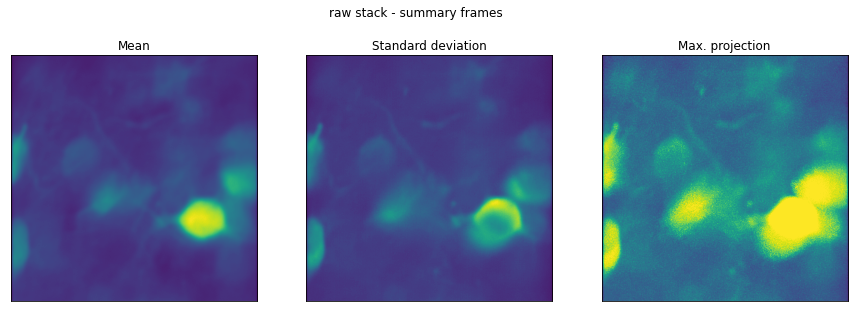

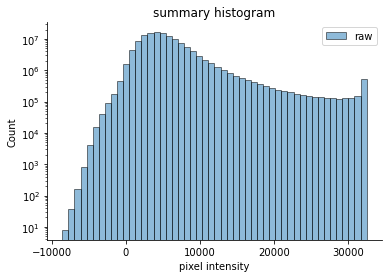

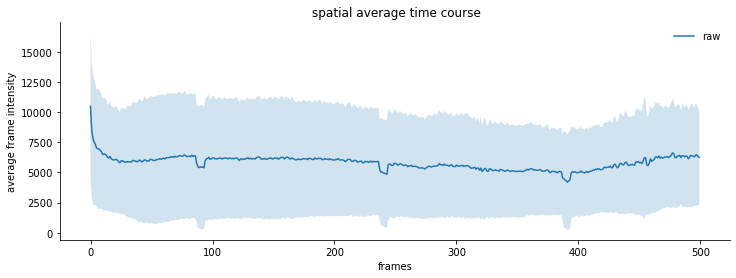

In [3]:
datadir = '/Users/tlemaire/Documents/data/benham/'
fname = '10x 1.85 Mhz 420000 20x 2v  31mw na-1_00002.tif'
rawdir = os.path.join(datadir, 'raw')
raw_fpath = os.path.join(rawdir, fname)
stackfpaths = {'raw': raw_fpath}

# Load stack
raw_stack = loadtif(raw_fpath)
stackdict = {'raw': raw_stack}

# Plot stack summary frames
fig1 = plot_stack_summary_frames(raw_stack, title='raw stack')

# Plot stack histogram
fig2 = plot_stack_histogram(stackdict)

# Plot time course of the stack spatial average
fig3 = plot_stack_timecourse(stackdict)

# Interactive viewer
view_stack(stackfpaths)

### Normalize stack intensity range

 25/02/2022 12:09:52: "/Users/tlemaire/Documents/data/benham/norm/10x 1.85 Mhz 420000 20x 2v  31mw na-1_00002.tif" already exists
 25/02/2022 12:09:52: saving (500, 512, 512) int16 stack as "/Users/tlemaire/Documents/data/benham/norm/10x 1.85 Mhz 420000 20x 2v  31mw na-1_00002.tif"...
 25/02/2022 12:09:54: plotting stack(s) histogram...
 25/02/2022 12:09:56: initializing stack viewer
 25/02/2022 12:09:56: stack size: (500, 512, 512)
 25/02/2022 12:09:56: computing stack intensity range across 0 - 499 frame range...


100%|██████████| 500/500 [00:00<00:00, 1884.60it/s]

 25/02/2022 12:09:56: intensity range: 0 - 1000



100%|██████████| 500/500 [00:00<00:00, 1922.86it/s]

 25/02/2022 12:09:56: initializing stack viewer
 25/02/2022 12:09:56: stack size: (500, 512, 512)
 25/02/2022 12:09:56: computing stack intensity range across 0 - 499 frame range...



100%|██████████| 500/500 [00:00<00:00, 1526.86it/s]

 25/02/2022 12:09:56: intensity range: 0 - 1000
 25/02/2022 12:09:56: rendering stack view...


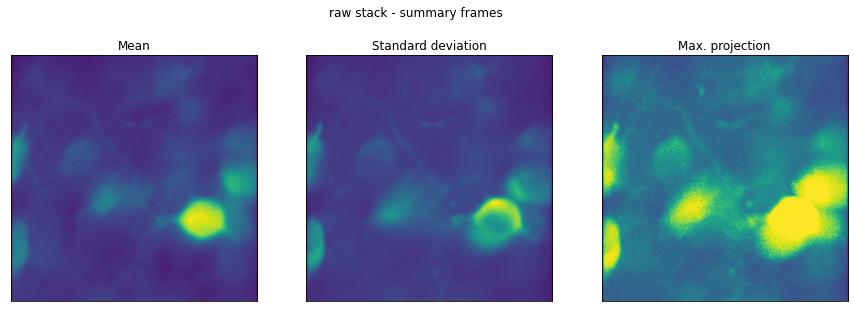

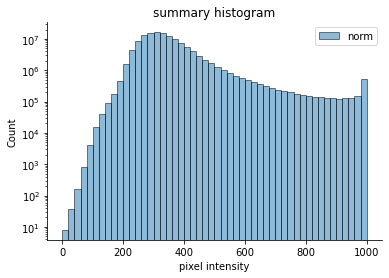

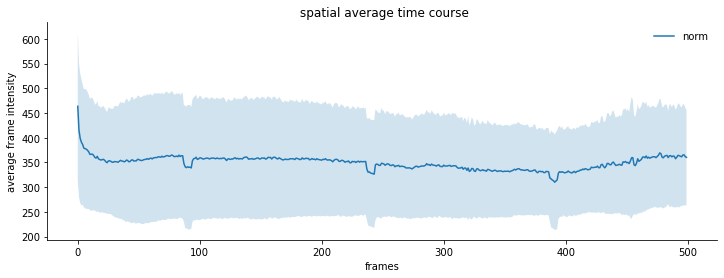

In [4]:
# Normalize to [0-1000] range
norm_stack = normalize_stack(raw_stack)
nframes, Ly, Lx = norm_stack.shape

# Save to file
normdir = os.path.join(datadir, 'norm')
if not os.path.isdir(normdir):
    os.makedirs(normdir)
pos_fpath = os.path.join(normdir, fname)
savetif(pos_fpath, norm_stack, overwrite=True)

# Overwrite dictionaries 
stackfpaths = {'norm': pos_fpath}
stackdict = {'norm': norm_stack}

# Plot stack summary frames
fig1 = plot_stack_summary_frames(norm_stack, title='raw stack')

# Plot stack histogram
fig2 = plot_stack_histogram(stackdict)

# Plot time course of the stack spatial average
fig3 = plot_stack_timecourse(stackdict)

# Interactive viewer
view_stack(stackfpaths)

### Rigid registration

 25/02/2022 12:09:57: running suite2p 0.10.2 with the following options:
{'denoise': False,
 'do_registration': 1,
 'nonrigid': False,
 'reg_tif': True,
 'roidetect': False}
 25/02/2022 12:09:57: data will be saved in suite2p base directory "suite2p_not_nonrigid_not_roidetect_reg_tif"
 25/02/2022 12:09:57: found all suite2p output files in "/Users/tlemaire/Documents/data/benham/norm/suite2p_not_nonrigid_not_roidetect_reg_tif/plane0"
 25/02/2022 12:09:57: run options match 100% -> ignoring
 25/02/2022 12:09:57: empty data path -> no run
 25/02/2022 12:09:57: loading suite2p binary stack...
 25/02/2022 12:10:00: plotting stack(s) histogram...
 25/02/2022 12:10:03: initializing stack viewer
 25/02/2022 12:10:03: stack size: (500, 512, 512)
 25/02/2022 12:10:03: computing stack intensity range across 0 - 499 frame range...


100%|██████████| 500/500 [00:00<00:00, 1875.57it/s]

 25/02/2022 12:10:04: intensity range: 0 - 1000



100%|██████████| 500/500 [00:00<00:00, 9906.10it/s]

 25/02/2022 12:10:04: intensity range: 0.0 - 1000.0



100%|██████████| 500/500 [00:00<00:00, 3527.21it/s]

 25/02/2022 12:10:04: plotting suite2p registration offsets...
 25/02/2022 12:10:04: initializing stack viewer
 25/02/2022 12:10:04: stack size: (500, 512, 512)
 25/02/2022 12:10:04: computing stack intensity range across 0 - 499 frame range...



100%|██████████| 500/500 [00:00<00:00, 6452.46it/s]

 25/02/2022 12:10:04: intensity range: 0.0 - 2000.0
 25/02/2022 12:10:04: rendering stack view...


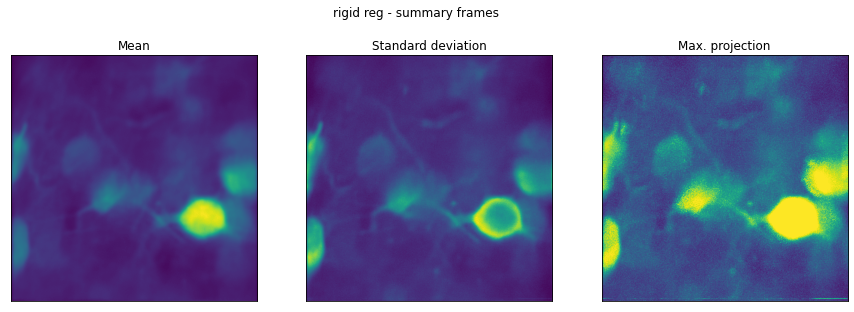

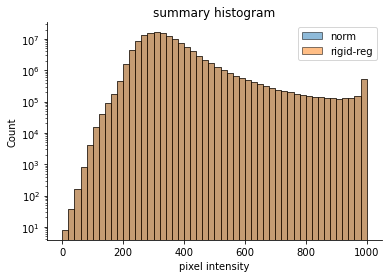

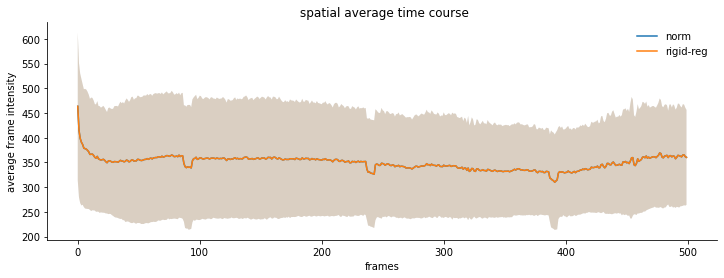

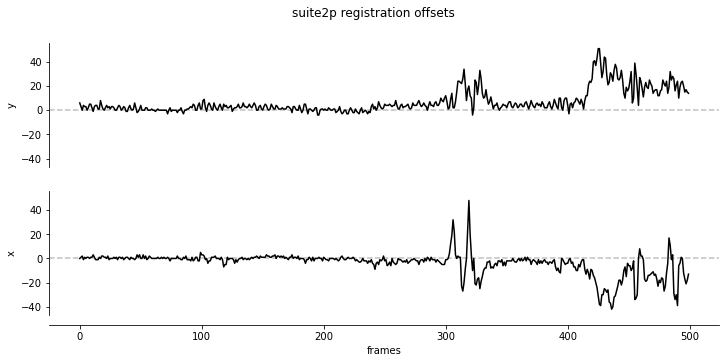

In [5]:
# Define suite2p options
ops = {
    'do_registration': 1,  # whether or not to perform image registration,
    'denoise': False,  # perform PCA denoising of the registered stack prior to ROI detection
    'roidetect': False,  # whether or not to run ROI detect and extraction
    'reg_tif': True,  # whether or not to write the registered binary to tiff files
    'nonrigid': False  # whether or not to perform non-rigid registration, which splits the field of view into blocks and computes registration offsets in each block separately.
}

# Run suite2p with custom options
s2p_basedir = run_s2p_and_rename(
    ops=ops, db={'data_path': [normdir]}, overwrite=False)

# Load suite2p output data and extract options dictionary
s2p_output_fpath = os.path.join(normdir, s2p_basedir, 'plane0')
s2p_ops = get_suite2p_options(s2p_output_fpath, s2p_basedir=s2p_basedir)
outstack_label = get_s2p_stack_label(s2p_ops)

# Load stack
stack = get_s2p_stack(s2p_ops) / 2
stackdict['rigid-reg'] = stack

# Plot stack summary frames
fig1 = plot_stack_summary_frames(stack, title='rigid reg')

# Plot stacks histogram
fig2 = plot_stack_histogram(stackdict)

# Plot time course of the stacks spatial averages
fig3 = plot_stack_timecourse(stackdict)

# Plot registration offsets over time
fig4 = plot_suite2p_registration_offsets(
    s2p_ops, title='suite2p registration offsets')

# Interactive viewer
view_stack(s2p_ops, title=outstack_label)

### Non-rigid registration (1 block per row)

 25/02/2022 12:10:18: running suite2p 0.10.2 with the following options:
{'block_size': (16, 512),
 'denoise': False,
 'do_registration': 1,
 'nonrigid': True,
 'reg_tif': True,
 'roidetect': False}
 25/02/2022 12:10:18: data will be saved in suite2p base directory "suite2p_block_size_(16, 512)_not_roidetect_reg_tif"
 25/02/2022 12:10:18: found all suite2p output files in "/Users/tlemaire/Documents/data/benham/norm/suite2p_block_size_(16, 512)_not_roidetect_reg_tif/plane0"
 25/02/2022 12:10:18: run options match 100% -> ignoring
 25/02/2022 12:10:18: empty data path -> no run
 25/02/2022 12:10:18: loading suite2p binary stack...
 25/02/2022 12:10:22: plotting stack(s) histogram...
 25/02/2022 12:10:29: initializing stack viewer
 25/02/2022 12:10:29: stack size: (500, 512, 512)
 25/02/2022 12:10:29: computing stack intensity range across 0 - 499 frame range...


100%|██████████| 500/500 [00:00<00:00, 1439.51it/s]

 25/02/2022 12:10:30: intensity range: 0 - 1000



100%|██████████| 500/500 [00:00<00:00, 1042.57it/s]

 25/02/2022 12:10:30: intensity range: 0.0 - 1000.0



100%|██████████| 500/500 [00:00<00:00, 1661.82it/s]

 25/02/2022 12:10:31: intensity range: -201.0 - 1118.0



100%|██████████| 500/500 [00:00<00:00, 1074.01it/s]

 25/02/2022 12:10:31: intensity range: -171.0 - 1114.0



100%|██████████| 500/500 [00:00<00:00, 774.86it/s]

 25/02/2022 12:10:33: plotting suite2p registration offsets...


 25/02/2022 12:10:33: initializing stack viewer
 25/02/2022 12:10:33: stack size: (500, 512, 512)
 25/02/2022 12:10:33: computing stack intensity range across 0 - 499 frame range...


100%|██████████| 500/500 [00:00<00:00, 3762.73it/s]

 25/02/2022 12:10:34: intensity range: -342.0 - 2228.0
 25/02/2022 12:10:34: rendering stack view...


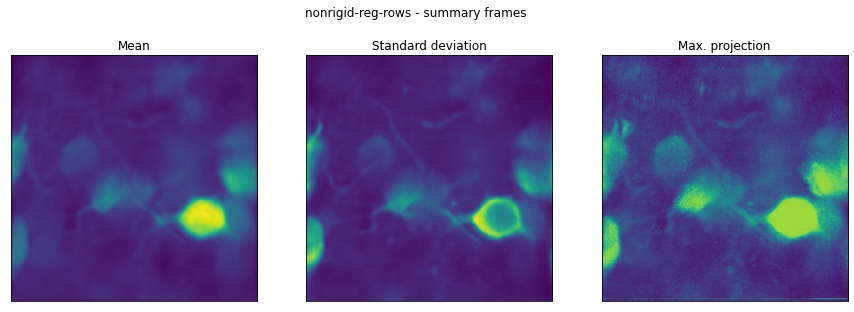

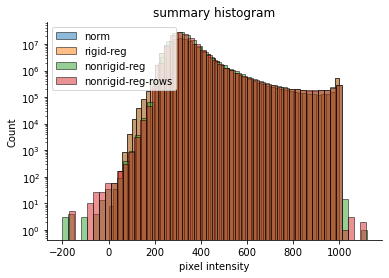

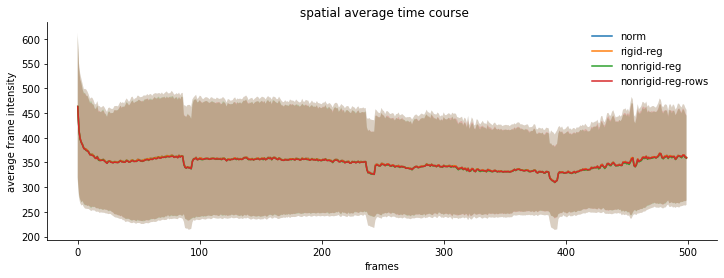

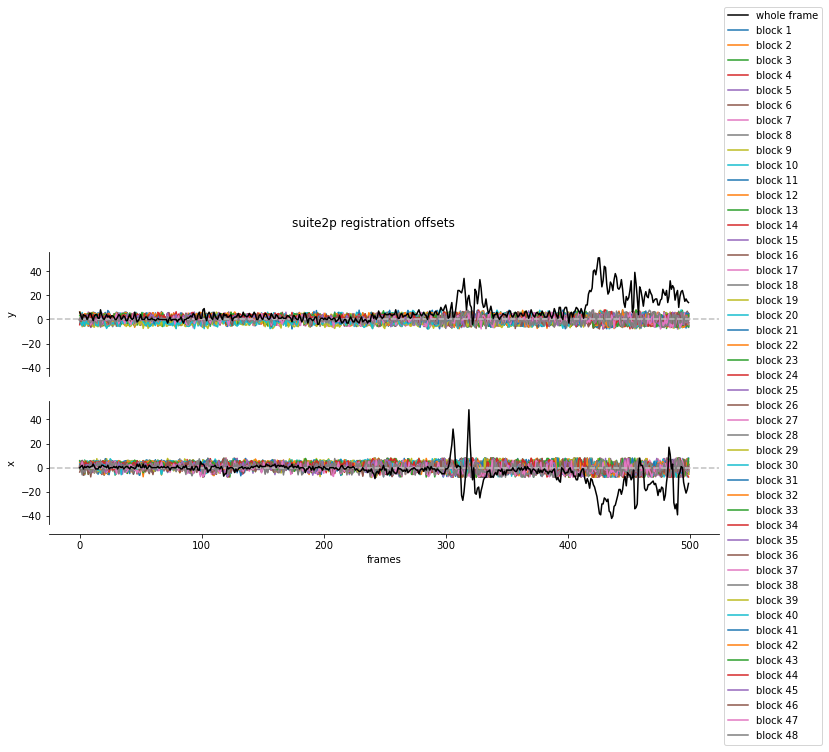

In [7]:
# Define suite2p options
ops = {
    'do_registration': 1,  # whether or not to perform image registration,
    'denoise': False,  # perform PCA denoising of the registered stack prior to ROI detection
    'roidetect': False,  # whether or not to run ROI detect and extraction
    'reg_tif': True,  # whether or not to write the registered binary to tiff files
    'nonrigid': True,  # whether or not to perform non-rigid registration, which splits the field of view into blocks and computes registration offsets in each block separately.
    'block_size': [16, Lx],  # size of blocks (in pixels) for non-rigid registration
}

# Run suite2p with custom options
s2p_basedir = run_s2p_and_rename(
    ops=ops, db={'data_path': [normdir]}, overwrite=False)

# Load suite2p output data and extract options dictionary
s2p_output_fpath = os.path.join(normdir, s2p_basedir, 'plane0')
s2p_ops = get_suite2p_options(s2p_output_fpath, s2p_basedir=s2p_basedir)
outstack_label = get_s2p_stack_label(s2p_ops)

# Load stack
stack = get_s2p_stack(s2p_ops) / 2
stackdict['nonrigid-reg-rows'] = stack

# Plot stack summary frames
fig1 = plot_stack_summary_frames(stack, title='nonrigid-reg-rows')

# Plot stacks histogram
fig2 = plot_stack_histogram(stackdict)

# Plot time course of the stacks spatial averages
fig3 = plot_stack_timecourse(stackdict)

# Plot registration offsets over time
fig4 = plot_suite2p_registration_offsets(
    s2p_ops, title='suite2p registration offsets')

# Interactive viewer
view_stack(s2p_ops, title=outstack_label)